# UTN FRBA 
## Ciencia de Datos - Ingeniería Industrial
### Examen Practico 14 noviembre 2020

### Nombre Apellido y Legajo

In [1]:
### Facundo Nahuel 
### Paez
### 159914-8
### nahuel.paez.1997@gmail.com

### Importamos algunas librerias. Puede ser que falten algunas y tengas que importarlas vos mas adelante.

In [2]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA as sklearnPCA
import matplotlib.cm as cm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Ridge
from sklearn.svm import SVR
#Metricas
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

### El dataset esta pre-cargado. Con solo correr esta celda se cargará la matriz de sample-features en la variable "x" y sus respectivas etiquetas/labels en la variable "y".

In [3]:
boston = load_boston()
boston.data.shape
x = boston.data
y = boston.target

### Ejercicio 01:
- Al dataset original de samples "x" transformarlo/pre-preprocesarlo con "StandardScaler" de manera tal que las features tengan media = 0 y desvio standard = 1. Al dataset transformado guardarlo en una variable llamada "xscal".
- Con "xscal" realizar un PCA con 2 componentes sobre la matrix "x" y obtener una matriz "xpca". Es decir que "xpca" tendra las nuevas features (componentes principales) obtenidas por el PCA. 
- Con las dos componentes principales del PCA que se encuentran en la matriz "xpca" realizar un scatter plot para visualizar el dataset.

In [4]:
scaler = preprocessing.StandardScaler().fit(x)
scaler

StandardScaler()

In [5]:
# Guardamos a la variable X preprocesada con StandarScaler bajo un nuevo nombre llamado xscal
xscal = scaler.transform(x)  

In [6]:
# Generamos un PCA con los datos luego del scaler en la variable x
n_comps = 2
sklearn_pca = sklearnPCA(n_components= n_comps)
xpca = pd.DataFrame(sklearn_pca.fit_transform(xscal))
eigenvalues = sklearn_pca.explained_variance_ratio_

No handles with labels found to put in legend.


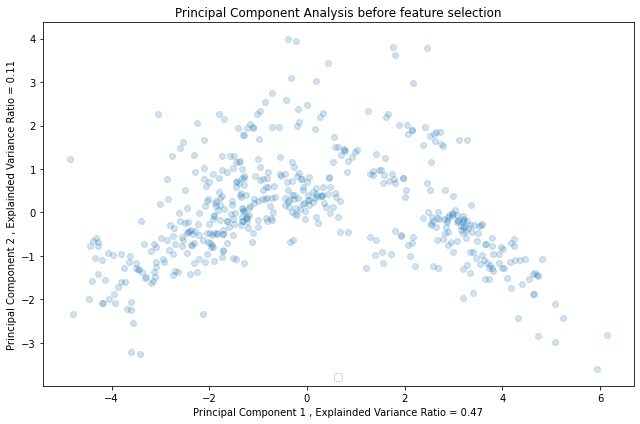

In [7]:
# Realizo un scatter plot de los datos con las 2 primeras componentes principales del PCA
plt.figure(figsize=(9,6))
plt.scatter(xpca.loc[:,0],xpca.loc[:,1], alpha = 0.2)    
plt.xlabel('Principal Component 1 , Explainded Variance Ratio = ' + str(np.round(eigenvalues[0],2)))
plt.ylabel('Principal Component 2 , Explainded Variance Ratio = ' + str(np.round(eigenvalues[1],2)))
plt.title('Principal Component Analysis before feature selection')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()

Utilizando la matriz "xscal" dividir en train y test. Realizar una regresion lineal para predecir la variable continua "y". Para simplificar, durante el entrenamiento de la regresion no es necesario aplicar gridsearchCV ni cross validation, solamente "fitear" el modelo de regresion a los datos de train y predecir en test. Calcular el error cuadrático medio RMSE para los datos de test (seguramente tengas que importar algunas librerias).

In [8]:
#Adopto un test size de 0,3, por lo tanto, se entrenara con el 70% de los datos, quedando un 30% para realizar los testeos
xtrain, xtest, ytrain, ytest = train_test_split(xscal, y, test_size=0.30, random_state=42)

In [9]:
# 1) creo un modelo generico de regresion lineal
lr = LinearRegression()

In [10]:
# 2) Ajusto el modelo de regresion lineal utilizando el set de train, tanto las features X como las samples Y
lr.fit(xtrain, ytrain)

LinearRegression()

In [11]:
# Obtengo las predicciones que realiza mi modelo con las muestras de test, sin mostrarle las labels (Ytest).
# Las predicciones las guardo en el vector "ypred"
ypred = lr.predict(xtest)

In [12]:
np.shape(ypred)

(152,)

In [13]:
# calculo el error cuadratico medio de mi modelo con las muestras de train = error de train
np.sqrt(mean_squared_error(ytest, ypred))

4.638689926172827

In [14]:
#aqui el error cuadratico medio al cuadrado
mean_squared_error(ytest, ypred)

21.51744423117727